In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data preparation

In [53]:
df = pd.read_excel("dataset MLR.xlsx")
df.head()

,sex,age,smoker,region,BMI,#children,amout
0,male,55,no,W,29.90,0,10214.63600
1,female,35,no,S,35.86,2,5836.52040
2,male,34,no,W,32.80,1,14358.36437
3,female,19,no,W,18.60,0,1728.89700
4,female,39,no,S,23.87,5,8582.30230


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        1338 non-null   object 
 1   age        1338 non-null   int64  
 2   smoker     1338 non-null   object 
 3   region     1338 non-null   object 
 4   BMI        1338 non-null   float64
 5   #children  1338 non-null   int64  
 6   amout      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0.5, 1.0, 'Missing values in dataset')

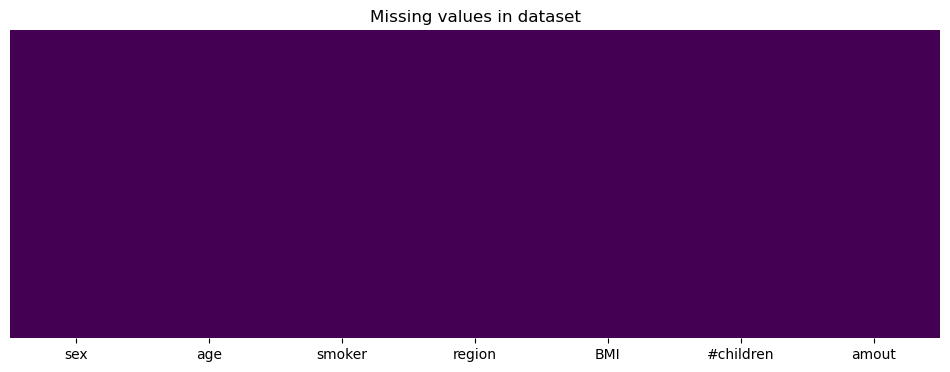

In [55]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing values in dataset")

## Data preprocessing

In [56]:
categorical_col = ["sex", "smoker", "region"]
df_dummies = pd.get_dummies(df[categorical_col], prefix=categorical_col).drop(
    columns=["sex_female", "smoker_no", "region_E"]
)
df = df.drop(columns=categorical_col)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,age,BMI,#children,amout,sex_male,smoker_yes,region_N,region_S,region_W
0,55,29.90,0,10214.63600,1,0,0,0,1
1,35,35.86,2,5836.52040,0,0,0,1,0
2,34,32.80,1,14358.36437,1,0,0,0,1
3,19,18.60,0,1728.89700,0,0,0,0,1
4,39,23.87,5,8582.30230,0,0,0,1,0


## Split train and test set

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["amout"])
y = df["amout"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Model construction

## Without log normalization

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train.values.reshape(-1, 1))

In [59]:
sk_theta = list(model.intercept_) + list(model.coef_.flatten())

In [60]:
param = ["theta_" + str(i) for i in range(X_train.shape[1] + 1)]
columns = ["intercept"] + list(X_train.columns.values)

param_df = pd.DataFrame({"parameter": param, "columns": columns, "sk_theta": list(sk_theta)})
param_df

,parameter,columns,sk_theta
0,theta_0,intercept,-11123.218309
1,theta_1,age,257.336853
2,theta_2,BMI,316.728241
3,theta_3,#children,408.048953
4,theta_4,sex_male,-19.589655
5,theta_5,smoker_yes,24282.283222
6,theta_6,region_N,-644.276286
7,theta_7,region_S,-1143.711430
8,theta_8,region_W,-1169.810279


### Evaluation

In [61]:
y_pred_sk = model.predict(X_test)

In [62]:
from numpy.ma import MAError
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred_sk)
MSE = metrics.mean_squared_error(y_test, y_pred_sk, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred_sk, squared=False)

print("MAE is", MAE)
print("MSE is", MSE)
print("RMAE is", RMSE)
print("R2 is", model.score(X_test, y_test))

MAE is 4112.55124837087
MSE is 34930013.72697601
RMAE is 5910.16190361787
R2 is 0.7536226595128667


## With log normalization

### Take log normalization

In [63]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [64]:
lin_reg = LinearRegression()
model_log = lin_reg.fit(X_train, y_train.values.reshape(-1, 1))

In [65]:
sk_theta = list(model_log.intercept_) + list(model_log.coef_.flatten())

In [66]:
param = ["theta_" + str(i) for i in range(X_train.shape[1] + 1)]
columns = ["intercept"] + list(X_train.columns.values)

param_df = pd.DataFrame({"parameter": param, "columns": columns, "sk_theta": list(sk_theta)})
param_df

,parameter,columns,sk_theta
0,theta_0,intercept,7.072904
1,theta_1,age,0.034083
2,theta_2,BMI,0.012407
3,theta_3,#children,0.096474
4,theta_4,sex_male,-0.046729
5,theta_5,smoker_yes,1.568186
6,theta_6,region_N,-0.064214
7,theta_7,region_S,-0.145215
8,theta_8,region_W,-0.132365


In [67]:
y_pred_sk_log = model_log.predict(X_test)

### Evaluation

In [68]:
from numpy.ma import MAError
from sklearn import metrics

MAE = metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_sk_log))
MSE = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_sk_log), squared=True)
RMSE = metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_sk_log), squared=False)

print("MAE is", MAE)
print("MSE is", MSE)
print("RMAE is", RMSE)
print("R2 is", model_log.score(X_test, y_test))

MAE is 3835.542102180685
MSE is 57197219.72121146
RMAE is 7562.884351965952
R2 is 0.7781365576274974
